In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Load the dataset into python environment

In [2]:
 pd.read_excel(r'C:\Users\amani\OneDrive\Desktop\KKEM-ICT-DSA\iris (1).xls')

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data = pd.read_excel(r'C:\Users\amani\OneDrive\Desktop\KKEM-ICT-DSA\iris (1).xls')

In [4]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2.Check the basic details of the dataset

In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
for i in ['SL', 'SW', 'PL']:
    data[i] = data[i].fillna(data[i].median())

In [8]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [27]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

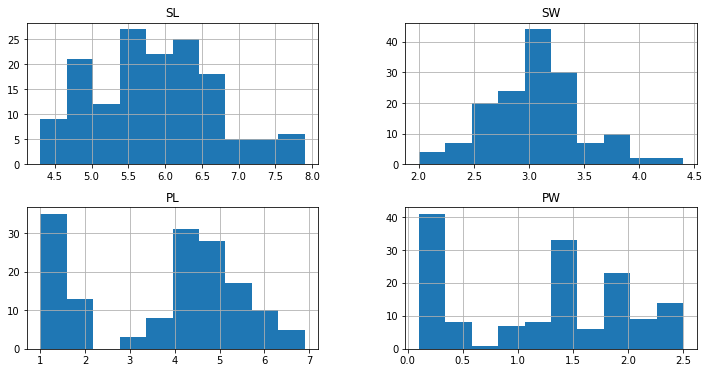

In [30]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(12,6))
plt.show()

Text(0.5, 1.0, 'Box Plot of Sepal Length')

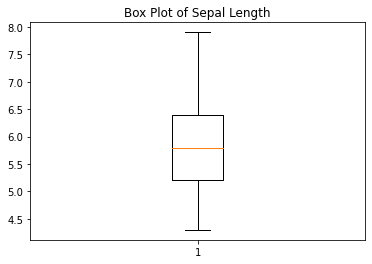

In [31]:
plt.boxplot(data['SL'])
plt.title("Box Plot of Sepal Length")

Text(0.5, 1.0, 'Box Plot of Sepal Width')

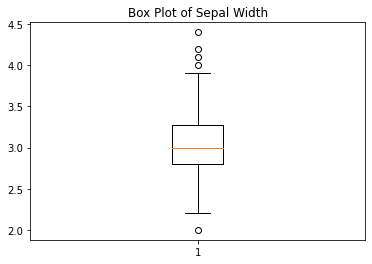

In [33]:
plt.boxplot(data['SW'])
plt.title("Box Plot of Sepal Width")

In [34]:
Q1 =np.percentile(data['SW'],25,interpolation='midpoint')
print(Q1)
Q2 =np.percentile(data['SW'],50,interpolation='midpoint')
print(Q2)
Q3 =np.percentile(data['SW'],75,interpolation='midpoint')
print(Q3)

2.8
3.0
3.25


In [35]:
data['SW'].median()

3.0

In [36]:
IQR=Q3-Q1
print(IQR)

0.4500000000000002


In [37]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [38]:
outlier =[]
for x in data['SW']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [39]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [41]:
indx=data['SW']>up_lim
data.loc[indx].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [42]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Box Plot of Peta Length')

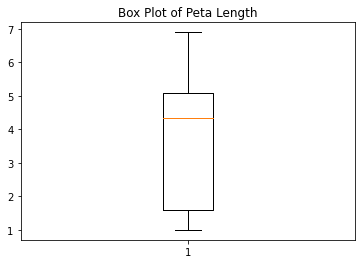

In [44]:
plt.boxplot(data['PL'])
plt.title("Box Plot of Peta Length")

Text(0.5, 1.0, 'Box Plot of Petal Width')

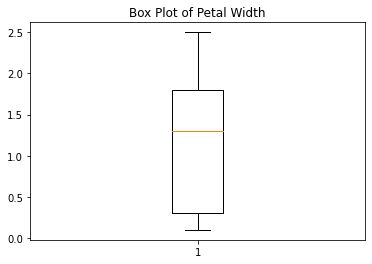

In [45]:
plt.boxplot(data['PW'])
plt.title("Box Plot of Petal Width")

In [47]:
data['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [48]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [49]:
data['Classification'] = lab_enc.fit_transform (data['Classification'])

In [50]:
data.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667,1.000000
std,0.808567,0.421995,1.729424,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = data.drop('Classification',axis=1)
y = data['Classification']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
X

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [56]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int32

# Model 1 - Logistic Regression

In [57]:
from sklearn.linear_model import LinearRegression

In [64]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
predictions = model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
Name: Classification, dtype: int32

In [72]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

# Model 2 - KNN model

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
metric_k =[]
neighbors = range(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train,y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

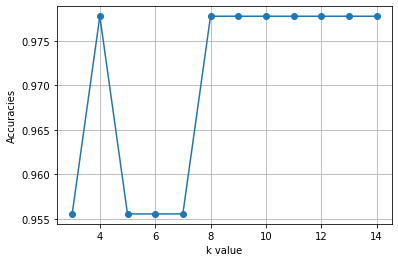

In [77]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("k value")
plt.ylabel("Accuracies")
plt.grid()

In [78]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train,y_train)
y_pred_kNN = classifier.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred_kNN)

0.9555555555555556

In [80]:
confusion_matrix(y_test,y_pred_kNN)

array([[18,  1,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

In [82]:
precision_score(y_test,y_pred_kNN,average='micro')

0.9555555555555556

# Min Max Scaling

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
X2 = data['Classification'] 
X1 = data.drop(['Classification'],axis=1)

In [85]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [86]:
X1 = min_max_scaler.fit_transform(X1)

In [87]:
type(X1)

numpy.ndarray

In [88]:
X1= pd.DataFrame(X1,columns=['SL','SW','PL','PW'])

In [89]:
X1.head()

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.416667,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [90]:
data1= pd.concat([X1,X2],axis=1)

In [91]:
X1.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.436389,0.471186,0.457778
std,0.224602,0.175831,0.293123,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.531250,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [92]:
data1.head()

,SL,SW,PL,PW,Classification
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.416667,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [93]:
data1.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.436389,0.471186,0.457778,1.000000
std,0.224602,0.175831,0.293123,0.317984,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.531250,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


In [94]:
X=data1.drop(['Classification'],axis=1)
y=data1['Classification']

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [96]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
predictions = model.predict(X_test)

In [98]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
Name: Classification, dtype: int32

# KNN model after MinMax scaling

In [100]:
metric_k =[]
neighbors = range(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train,y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [101]:
metric_k

[0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

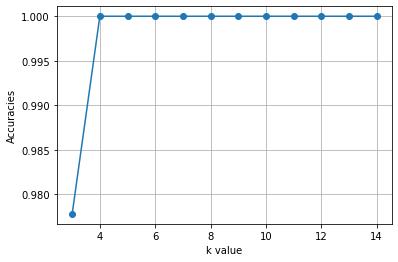

In [102]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("k value")
plt.ylabel("Accuracies")
plt.grid()

In [103]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train,y_train)
y_pred_kNN = classifier.predict(X_test)

In [105]:
precision_score(y_test,y_pred_kNN, average='micro')

1.0

# Model 3 - Linear kernel

In [106]:
from sklearn.svm import SVC

In [107]:
X = data.drop('Classification',axis=1)
y = data['Classification']

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [111]:
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(X_train,y_train)
predictions = svm_clf.predict(X_test)

In [112]:
confusion_matrix(y_test,predictions)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [113]:
accuracy_score(y_test,predictions)

1.0

In [114]:
X=data1.drop(['Classification'],axis=1)
y=data1['Classification']

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [116]:
svm_clf1 = SVC(kernel='linear')
svm_clf1 = svm_clf1.fit(X_train,y_train)
predictions1 = svm_clf1.predict(X_test)

In [117]:
accuracy_score(y_test,predictions1)

1.0

# Model 4 - Random forest 

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
X = data.drop('Classification',axis=1)
y = data['Classification']

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [121]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
predictions3 = rf_clf.predict(X_test)

In [122]:
confusion_matrix(y_test,predictions3)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [123]:
accuracy_score(y_test,predictions3)

1.0

In [124]:
X=data1.drop(['Classification'],axis=1)
y=data1['Classification']

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [126]:
rf_clf1 = RandomForestClassifier()
rf_clf = rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)

In [127]:
confusion_matrix(y_test,pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [128]:
accuracy_score(y_test,pred)

1.0

# Model 5 - Decision Tree 

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
X = data.drop('Classification',axis=1)
y = data['Classification']

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [132]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)
pred_dt = dt_clf.predict(X_test)

In [133]:
confusion_matrix(y_test,pred_dt)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [134]:
accuracy_score(y_test,pred_dt)

1.0

# checking accuracy in decision tree with scaled data

In [136]:
X=data1.drop(['Classification'],axis=1)
y=data1['Classification']

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [138]:
dt_clf1 = DecisionTreeClassifier()
dt_clf1 = dt_clf1.fit(X_train,y_train)
pred_dt1 = dt_clf1.predict(X_test)

In [139]:
confusion_matrix(y_test,pred_dt1)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [140]:
accuracy_score(y_test,pred_dt1)

1.0

In [ ]:
# Conclusion:- All the models have acuuracy 1 other than KNN model.We can accept all models except KNN.
# Scaling doesn't make any difference in accuracy of KNN too.
#We can accept the models 
# 1.Logistic, 2.SVM, 3.Decision tree & 4.random forest 